In [1]:
import openml
import pandas as pd
import numpy as np
import pymc3 as pm

In [2]:
import os.path, sys
sys.path.append(os.path.abspath('..'))

from processing.separation import *

In [7]:
dataset_id = 23
dataset = openml.datasets.get_dataset(dataset_id)
X, y, categorical, names = dataset.get_data(
    target=dataset.default_target_attribute,
    return_categorical_indicator=True,
    return_attribute_names=True)

_, X_non_categ = separate_categorical(X, categorical) # not actually used

print(X_non_categ.shape)
print(categorical)

(1473, 2)
[False, True, True, False, True, True, True, True, True]


In [69]:
data_concat = np.column_stack((X, y))
names_concat = ['x' + str(i) for i in range(1, X.shape[1] + 1)] + ['y']
names_concat

['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'y']

In [62]:
data_df = pd.DataFrame(data_concat, columns=names_concat)
data_df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,y
0,24.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,0.0,0.0
1,45.0,0.0,2.0,10.0,1.0,1.0,2.0,3.0,0.0,0.0
2,43.0,1.0,2.0,7.0,1.0,1.0,2.0,3.0,0.0,0.0
3,42.0,2.0,1.0,9.0,1.0,1.0,2.0,2.0,0.0,0.0
4,36.0,2.0,2.0,8.0,1.0,1.0,2.0,1.0,0.0,0.0
5,19.0,3.0,3.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0
6,38.0,1.0,2.0,6.0,1.0,1.0,2.0,1.0,0.0,0.0
7,21.0,2.0,2.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0
8,27.0,1.0,2.0,3.0,1.0,1.0,2.0,3.0,0.0,0.0
9,45.0,0.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0,0.0


In [67]:
with pm.Model() as model_glm:
    pm.GLM.from_formula('y ~ x1 + x4', data_df)
    trace = pm.sample()

100%|██████████| 1000/1000 [00:02<00:00, 499.42it/s]


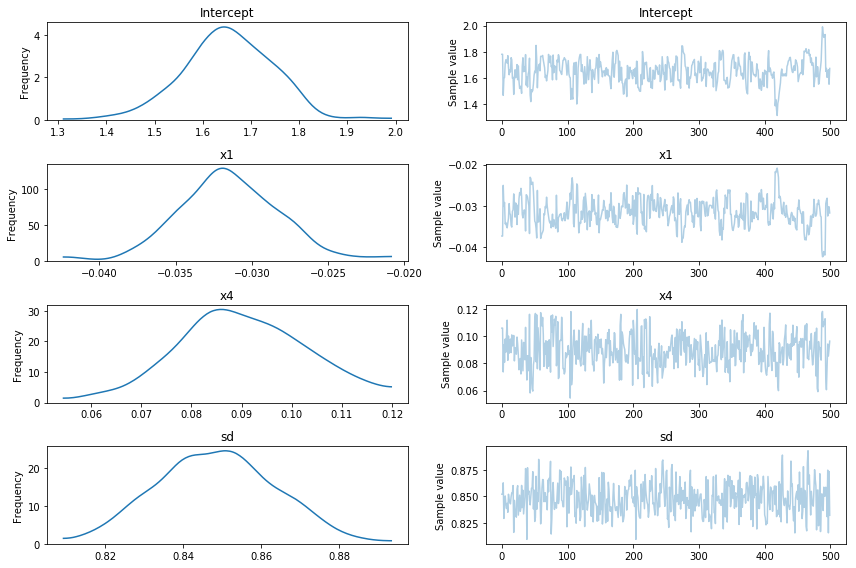

In [84]:
%matplotlib inline
_ = pm.traceplot(trace)

In [135]:
trace

<MultiTrace: 1 chains, 500 iterations, 5 variables>

In [129]:
# get all of the samples for a particular variable
print(type(trace['x1']))
print(len(trace['x1']))
print(trace['x1'][:5])
print(trace.get_values('x1')[:5])

<class 'numpy.ndarray'>
500
[-0.03733589 -0.03733589 -0.02503359 -0.03012766 -0.02918658]
[-0.03733589 -0.03733589 -0.02503359 -0.03012766 -0.02918658]


In [132]:
# get the full vector of a particular sample
print(trace[5])
print(trace.point(5))

{'Intercept': 1.7084344133865446, 'x1': -0.034365390950018913, 'x4': 0.098025407265375342, 'sd_log__': -0.16202472444939708, 'sd': 0.85042017810964066}
{'Intercept': 1.7084344133865446, 'x1': -0.034365390950018913, 'x4': 0.098025407265375342, 'sd_log__': -0.16202472444939708, 'sd': 0.85042017810964066}


In [133]:
# get "keys" for this dictionary-like Trace object
trace.varnames

['Intercept', 'x1', 'x4', 'sd_log__', 'sd']

In [9]:
%%time
# train model using all variables of a data matrix
with pm.Model() as model_glm:
    pm.GLM(X, y)
    trace = pm.sample()

Average Loss = 2,316.3:  15%|█▍        | 29686/200000 [00:06<00:35, 4853.68it/s]  
[INFO] [23:42:10:theano.gof.compilelock] Refreshing lock /tmp/nealbray/theano.NOBACKUP/compiledir_Linux-3.16--amd64-x86_64-with-debian-8.8--3.4.2-64/lock_dir/lock
100%|██████████| 1000/1000 [00:06<00:00, 157.20it/s]

CPU times: user 25.1 s, sys: 908 ms, total: 26 s
Wall time: 1min 10s
